***
\begin{equation}
\mathbf{\text{ODE of a Spring Mass Damper}}
\end{equation}
***

1. Spring Mass Damper reference analytical solution
3. $\alpha-generalized$ for 2nd order ODE formulation  (Displacement based)
2. $\alpha-generalized$ for 1st order ODE formulation (Velocity-Displacement based)

In [1]:
#------------------------------------------------------------------#
# Python libraries
#------------------------------------------------------------------#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
#------------------------------------------------------------------#
import ipywidgets as widgets
from ipywidgets import interactive, interact
from ipywidgets.embed import embed_minimal_html
#------------------------------------------------------------------#
# Visualization parameters
#------------------------------------------------------------------#
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#------------------------------------------------------------------#
font = {'weight' : 'bold','size'   : 12}
matplotlib.rc('font', **font)
#------------------------------------------------------------------#
from matplotlib import animation, rc
#------------------------------------------------------------------#
# Python libraries
#------------------------------------------------------------------#

***
\begin{equation}
\mathbf{\text{1. Analytical solution of a 2nd order ODE (constant external load)}}
\end{equation}
***

![Problem](./fig_spring_mass_damper_displacement.svg)

***

The problem consist in finding the displacement $u(t)$ for $t \in [t_0, \infty[$ which satisfy the following set of equations :

\begin{align}
    m \ddot{u} + c \dot{u} + k u - f(t) &= 0 \\
    u(t_0) - u_0 &= 0 \\
    \dot{u}(t_0) - \dot{u}_{0} &= 0
\end{align}

for sake of simplicity the external load is supposed to be constant :

\begin{equation}
    f(t) = f_0
\end{equation}

where $u_0$ and $\dot{u}_0$ are respectivaly the initial displacement and velocity. In this case the solution is a sum of an homogeneous and a particuliar solution : 

\begin{equation}
    u(t) = u_h(t) + u_p(t)
\end{equation}

The particular solution is in the same form of the loading excitation which is a constant. 

- Particular solution
- Carac


In [2]:
def springMassDamperFree(m,c,k,f,u0,v0,tmax,t0,nstep):
    h     = (tmax  - t0) / (nstep-1) 
    T = np.linspace(t0, t0 + (nstep-1) * h, num=nstep)
    #=================================================#
    # Pulsation and damp. factor
    #=================================================#
    ω0    = np.sqrt(k/m)
    ξ     = 0.5*c/np.sqrt(k*m)
    #=================================================#
    # Particular solution
    #=================================================#
    up = f/k
    #=================================================#
    # Solution based on damping
    #=================================================#
    if ξ > 1.0:
        #print('Over damper')
        λ1 = -ξ*ω0 + ω0*np.sqrt(ξ**2 - 1.0)
        λ2 = -ξ*ω0 - ω0*np.sqrt(ξ**2 - 1.0) 
        b  = np.array([u0 - up,v0])
        A  = np.array([[1.0,1.0], [λ1,λ2]])
        α  = np.linalg.solve(A, b)
        α1 = α[0]
        α2 = α[1]
        U  = α1*np.exp(λ1*T) + α2*np.exp(λ2*T) + up
        V  = α1*λ1*np.exp(λ1*T) + α2*λ2*np.exp(λ2*T)
        W  = α1*(λ1**2)*np.exp(λ1*T) + α2*(λ2**2)*np.exp(λ2*T)
    elif ξ == 1.0:
        #print('Critically damped')
        λ0 = -ξ*ω0
        b  = np.array([u0 - up,v0])
        A  = np.array([[1.0,0.0], [λ0,1.0]])
        α  = np.linalg.solve(A, b)
        α1 = α[0]
        α2 = α[1]
        U  = (α1+α2*T)*np.exp(λ0*T) + up
        V  = α1*λ0*np.exp(λ0*T) + α2*(1 + λ0*T)*np.exp(λ0*T)
        W  = ( α1*(λ0**2) + 2*α2*λ0 + α2*(λ0**2)*T )*np.exp(λ0*T) 
    else:
        #print('Under damped')
        ωD = ω0*np.sqrt(1.0 - ξ**2)
        b  = np.array([u0 - up,v0])
        A  = np.array([[1.0,0.0], [-ξ*ω0,ωD]])
        α  = np.linalg.solve(A, b)
        α1 = α[0]
        α2 = α[1]
        U  = (α1*np.cos(ωD*T) + α2*np.sin(ωD*T))*np.exp(-ξ*ω0*T) + up
        V  = (-α1*ωD*np.sin(ωD*T) + α2*ωD*np.cos(ωD*T))*np.exp(-ξ*ω0*T) \
            -( α1*np.cos(ωD*T)    +    α2*np.sin(ωD*T))*(ξ*ω0)*np.exp(-ξ*ω0*T)
        W = (-α1* (ωD)**2 * np.cos(ωD*T)  -  α2*(ωD)**2 * np.sin(ωD*T)  )*np.exp(-ξ*ω0*T) \
           -(-α1*  ωD     * np.sin(ωD*T)  +  α2* ωD     * np.cos(ωD*T)  )*(ξ*ω0)*np.exp(-ξ*ω0*T) \
           -(-α1*  ωD     * np.sin(ωD*T)  +  α2* ωD     * np.cos(ωD*T)  )*(ξ*ω0)*np.exp(-ξ*ω0*T) \
           +( α1*           np.cos(ωD*T)  +  α2*          np.sin(ωD*T)  )*((ξ*ω0)**2)*np.exp(-ξ*ω0*T)
    return U, V, W, T

In [3]:
#==================================================================#
# Interactive plot
#==================================================================#
def plotAnalyticalSolution(c,f,u0,v0,nstep):
    m    = 1.0
    k    = 1.0
    t0   = 0.0
    tmax = 30
    #----------------------------------------------------#
    (U, V, W, T) = springMassDamperFree(m,c,k,f,u0,v0,tmax,t0,nstep)
    #----------------------------------------------------#
    fig = plt.figure(figsize=(15,5))
    #----------------------------------------------------#
    plt.subplot(1,3,1)
    plt.plot(T,U,'--r')
    plt.xlim((0,tmax))
    plt.ylim((-2.0,2.0))
    plt.title("Displacement")
    plt.xlabel('t [s]')
    plt.grid(True)
    #----------------------------------------------------#
    plt.subplot(1,3,2)
    plt.plot(T,V,'--r')
    plt.xlim((0,tmax))
    plt.ylim((-2.0,2.0))
    plt.title("Velocity")
    plt.xlabel('t [s]')
    plt.grid(True)
    #----------------------------------------------------#
    plt.subplot(1,3,3)
    plt.plot(T,W,'--r')
    plt.xlim((0,tmax))
    plt.ylim((-2.0,2.0))
    plt.title("Acceleration")
    plt.xlabel('t [s]')
    plt.grid(True)
    return U, V, W, T
#==================================================================#
# Interactive solution
#==================================================================#
interactive_plotAnalyticalSolution = interactive(plotAnalyticalSolution,\
                                        c=0.2,\
                                        f=1.0,\
                                        u0=(0.0,1.0,1.0),\
                                        v0=(0.0,1.0,1.0),\
                                        nstep=(10,400,10))
interactive_plotAnalyticalSolution

interactive(children=(FloatSlider(value=0.2, description='c', max=0.6000000000000001, min=-0.2), FloatSlider(v…

***
\begin{equation}
\mathbf{\text{2. $Generalized-\alpha$ for 2nd order ODE formulation}}
\end{equation}
***


The problem consists in solving an averaging of the residual equation in between two time steps $t_n$ and $t_{n+1}$  such that :

\begin{align}
    m \ddot{u}_{n+\alpha_m} + c \dot{u}_{n+\alpha_f} + k u_{n+\alpha_f} - f(t_{n+\alpha_{f}}) &= 0 \\
       \ddot{u}_{n+\alpha_m} &= (1-\alpha_m) \ddot{u}_{n+1} + \alpha_{m}\dot{u}_{n} \\
       \dot{u}_{n+\alpha_f} &= (1-\alpha_f) \dot{u}_{n+1} + \alpha_{f}\dot{u}_{n} \\
       u_{n+\alpha_f} &= (1-\alpha_f) u_{n+1} + \alpha_{f} u_{n} \\
       \dot{u}_{n+1} &= \dot{u}_n + (1-\gamma) h \ddot{u}_n + \gamma h \ddot{u}_{n+1}\\
       u_{n+1} &= u_n +  h \dot{u}_n +  h^{2} (1/2 - \beta) \ddot{u}_{n} +  h^{2} \beta \ddot{u}_{n+1} \\
       u(t_0) = u_0 \\
       \dot{u}(t_0) = v_0
\end{align}

where $h = t_{n+1}-t_{n}$. According to [Chung and Hulbert 1993](https://asmedigitalcollection.asme.org/appliedmechanics/article-abstract/60/2/371/423023/A-Time-Integration-Algorithm-for-Structural?redirectedFrom=fulltext) we can express all the parameters $\alpha_f$, $\alpha_m$, $\gamma$ and $\beta$ to obtain an unconditionnaly stable numerical intergation in function of the spectral radius $\rho \; \in [0,1]$:

\begin{align}
    \alpha_{f} &= \frac{\rho}{1 +\rho} \\
    \alpha_{m} &= \frac{2\rho - 1}{ \rho +1} \\
    \gamma &= \frac{1}{2} + \alpha_{f} - \alpha_{m} \\
    \beta &= \frac{1}{4}(1 + \alpha_f - \alpha_m)^{2} \\
\end{align}

where $\rho = 1.0$ lead to zero numercial dissipation. After mathematical manipulations, the problem consists in finding $u_{n+1}$ such than:

\begin{align}
    \bar{s}  u_{n+1} = f(t_{n+\alpha_f}) - \bar{k}u_n - \bar{c}\dot{u}_n - \bar{m} \ddot{u}_n
\end{align}

where $\bar{s}$, $\bar{k}$, $\bar{c}$ and $\bar{k}$ are coefficients which depend on the material and time integration parameters, the known state variables and their rates :

\begin{align}
    \bar{s}&=   \frac{(1-\alpha_m)}{\beta h^{2}}m + \frac{\gamma}{\beta h} (1-\alpha_f) c + (1-\alpha_f)k  \\
    \bar{k}&=  -\frac{(1-\alpha_m)}{\beta h^{2}} m - \frac{\gamma}{\beta h} (1-\alpha_f) c + \alpha_f k\\
    \bar{c} &= - \frac{(1-\alpha_m)}{(\beta h)} m + \left\lbrace(1 - \frac{\gamma}{\beta})(1-\alpha_f) + \alpha_f\right\rbrace c \\
    \bar{m} &=  \left\lbrace 1 -  \frac{(1 - \alpha_m)}{2\beta}  \right\rbrace m +  \left\lbrace h(1-\alpha_f)(1 - \frac{\gamma}{2\beta})\right \rbrace c
\end{align}

In [4]:
#==================================================================#
# 𝛼−generalized function of 2 order ODE
#==================================================================#  
def genAlphaODE2(m,c,k,f,u0,v0,tmax,t0,nstep,𝜌):  
    #--------------------------------------------------------------#
    # Numerical integration parameters
    𝛼f =  𝜌 / (𝜌+1)
    𝛼m = (2*𝜌 - 1.0)/(𝜌 + 1.0) 
    𝛾  = 0.5 + 𝛼f - 𝛼m
    𝛽  = 0.25*((1.0 + 𝛼f - 𝛼m)**2)
    #print("𝛼m =",𝛼m,"𝛼f=",𝛼f, "𝛾=",𝛾,"𝛽=",𝛽)
    #--------------------------------------------------------------#
    # Time stepping and vector initialization
    h  = (tmax  - t0) / (nstep-1) 
    T  = np.linspace(t0, t0 + (nstep-1) * h, num=nstep)
    U = np.zeros(T.shape)
    V = np.zeros(T.shape)
    W = np.zeros(T.shape) 
    #--------------------------------------------------------------#
    # Second derivative
    def ddotu(u,un,vn,wn):
        ddu = (1/(𝛽*h**2))*(u - un - h*vn - (h**2)*(0.5 - 𝛽)*wn)
        return ddu
    #--------------------------------------------------------------#
    #First derivative
    def dotu(u,un,vn,wn):
        du =    (𝛾/(𝛽*h)                  )*u \
              - (𝛾/(𝛽*h)                  )*un\
              + (1-(𝛾/𝛽)                  )*vn\
              + ((1-𝛾)*h - (h*𝛾/𝛽)*(0.5 - 𝛽))*wn
        return du
    #--------------------------------------------------------------#
    # Loop over time
    for i in range(0,len(U)):
        if i == 0:
            w0 = (1/m)*(f - k*u0 - c*v0)
            #w0 = 0.0
            U[i] = u0
            V[i] = v0
            W[i] = w0
        else:
            un = U[i-1]
            vn = V[i-1]
            wn = W[i-1]
            c1 = 𝛾*(1-𝛼f)/(𝛽*h)
            c2 = (1 - (𝛾/𝛽))*(1-𝛼f)
            c3 = h*(1-𝛼f)*(1 - 𝛾/(2*𝛽))
            m1 = (1-𝛼m)/(𝛽*(h**2))
            m2 = (1-𝛼m)/(𝛽*h)
            m3 = 1 - ((1-𝛼m)/(2*𝛽))
            kb = k*(1-𝛼f) + c1*c + m1*m
            u = (1/kb)*(f - (-m*m1 - c*c1 + 𝛼f*k)*un\
                          - (-m*m2 + c*c2 + c*𝛼f)*vn\
                          - ( m*m3 + c*c3       )*wn)
            v =  dotu(u,un,vn,wn)   
            w = ddotu(u,un,vn,wn)  
            U[i] = u
            V[i] = v
            W[i] = w
    return U,V,W,T

In [5]:
def plotNumericalSolution(c,f,u0,v0,nstep,𝜌):
    m = 1.0
    k = 1.0
    tmax = 20.0
    t0 = 0.0
    #----------------------------------------------------#
    (U𝛼,V𝛼,W𝛼,T𝛼) = genAlphaODE2(m,c,k,f,u0,v0,tmax,t0,nstep,𝜌) 
    (U, V, W, T ) = springMassDamperFree(m,c,k,f,u0,v0,tmax,t0,nstep)
    #----------------------------------------------------#
    fig = plt.figure(figsize=(15,5))
    #----------------------------------------------------#
    plt.subplot(1,3,1)
    plt.plot(T,U𝛼,'-k',label='Numeric')
    plt.plot(T,U,'--r',label='Exact')
    plt.xlim((0,tmax))
    plt.ylim((-2.0,2.0))
    plt.title("Displacement")
    plt.grid(True)
    plt.legend(loc='lower center')
    #----------------------------------------------------#
    plt.subplot(1,3,2)
    plt.plot(T,V𝛼,'-k',label='Numeric')
    plt.plot(T,V,'--r',label='Exact')
    plt.xlim((0,tmax))
    plt.ylim((-2.0,2.0))
    plt.title("Velocity")
    plt.grid(True)
    plt.legend(loc='lower center')
    #----------------------------------------------------#
    plt.subplot(1,3,3)
    plt.plot(T,W𝛼,'-k',label='Numeric')
    plt.plot(T,W,'--r',label='Exact')
    plt.xlim((0,tmax))
    plt.ylim((-2.0,2.0))
    plt.title("Acceleration")
    plt.grid(True)
    plt.legend(loc='lower center')
#==================================================================#
# 𝛼−generalized function of 2 order ODE
#==================================================================#  
interactive_plotNumericalSolution = interactive(plotNumericalSolution,\
                                        c=0.2,\
                                        f=(0.0,1.0,1.0),\
                                        u0=1,\
                                        v0=(0.0,1.0,1.0),\
                                        nstep=(10,400,10),\
                                        𝜌=(0.0,1.0,0.1))
interactive_plotNumericalSolution

interactive(children=(FloatSlider(value=0.2, description='c', max=0.6000000000000001, min=-0.2), FloatSlider(v…

***
\begin{equation}
\mathbf{\text{Convergence analysis}}
\end{equation}
***

For a given analytical state of variable $q$ and its numerical approximation $q_{num}$, we define $\textbf{q}$ and $\textbf{q}_{nun}$ the vectors which contains the state variables values at each discrete time steps in a given range $t \: \in [t_0, t_N]$ :

\begin{equation}
    e(\textbf{q}_{num} - \textbf{q}) = \frac{\mid \mid \textbf{q}_{num} - \textbf{q}\mid \mid_{\mathcal{L_2}}}{\mid \mid \textbf{q} \mid \mid_{\mathcal{L_2}}}
\end{equation}

where 

\begin{equation}
    \textbf{q} = [q(t_0) \quad q(t_1) \quad ... \quad q(t_{N}) ]^{\text{T}}
\end{equation}

and the $\mathcal{L}_{2}$-norm is define as :

\begin{align}
    \mid \mid \textbf{q} \mid \mid_{\mathcal{L_2}} = \sqrt{\textbf{q}^{\text{T}} \textbf{q}}
\end{align}


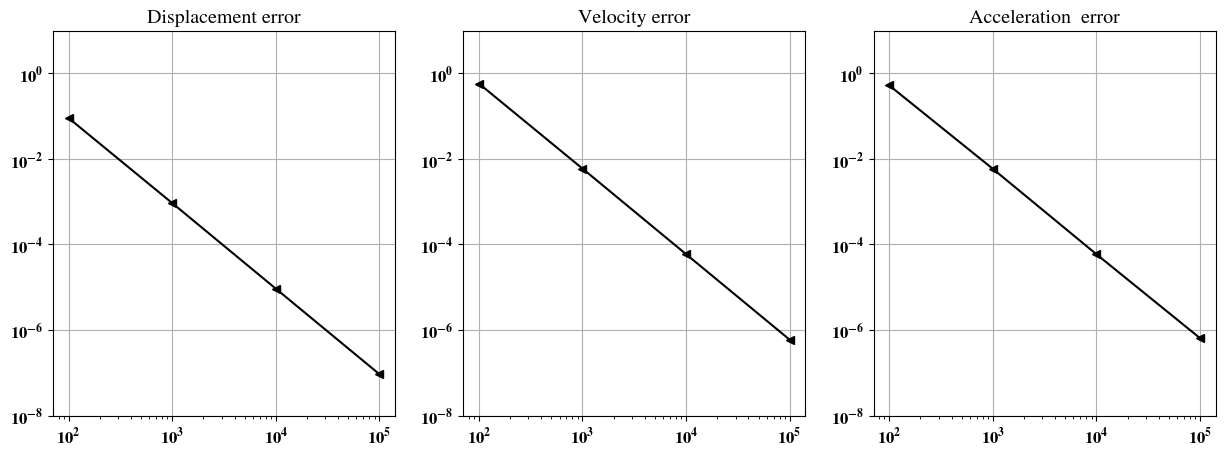

In [6]:
def errorODE2(): 
    #----------------------------------------------------#
    exponent = np.array([2,3,4,5])
    cases    = 10**(exponent)
    errU     = np.zeros(exponent.shape)
    errV     = np.zeros(exponent.shape)
    errW     = np.zeros(exponent.shape)
    #----------------------------------------------------#
    m = 1.0
    k = 1.0
    f = 1.0
    c = 0.2
    𝜌 = 1.0
    u_init= 0.0
    v_init= 0.0
    tmax = 100.0
    t0 = 0.0
    #----------------------------------------------------#
    for i in range(0,len(cases)):
        (U𝛼,V𝛼,W𝛼,T𝛼) =genAlphaODE2(m,c,k,f,u_init,v_init,tmax,t0,cases[i],𝜌) 
        (U, V, W, T ) =springMassDamperFree(m,c,k,f,u_init,v_init,tmax,t0,cases[i])
        errU[i] = np.linalg.norm(U𝛼-U,2)  / np.linalg.norm(U,2)
        errV[i] = np.linalg.norm(V𝛼-V,2)  / np.linalg.norm(V,2)
        errW[i] = np.linalg.norm(W𝛼-W,2)  / np.linalg.norm(W,2)
    #----------------------------------------------------#
    fig = plt.figure( figsize=(15,5))
    plt.subplot(1,3,1)
    plt.loglog(cases,errU,'k<-')
    plt.grid(True)
    plt.ylim((1e-8,1e1))
    plt.title("Displacement error")
    #----------------------------------------------------#
    plt.subplot(1,3,2)
    plt.loglog(cases,errV,'k<-')
    plt.grid(True)
    plt.ylim((1e-8,1e1))
    plt.title("Velocity error")
    #----------------------------------------------------#
    plt.subplot(1,3,3)
    plt.loglog(cases,errW,'k<-')
    plt.grid(True)
    plt.ylim((1e-8,1e1))
    plt.title("Acceleration  error")
    return
errorODE2()

***
\begin{equation}
\mathbf{\text{3. Generalized-$\alpha$ for 1st order ODE (velocity-displacement based approach) }}
\end{equation}
***

![Problem](./fig_spring_mass_damper_displacement_velocity.svg)


The problem consists in finding the displacement and the velocity respectively denoted by $u$ and $v$ of a mass $m$ such that : 

\begin{align}
     m \dot{v} + c v + k u - f(t) &= 0\\
     \dot{u} -  v &= 0 \\
     v(t=0) &=  v_0 \\
     u(t=0) &= u_0 
\end{align}

where $c$ is the damping cooeficient and $k$ the spring stiffness. The problem can be re-written in a matric format as : 

\begin{align}
    \textbf{A} \dot{\textbf{x}} + \textbf{B} \textbf{x} - \textbf{f}(t) &= \textbf{0} \\
    \textbf{x}(t=0) &= \textbf{x}_0
\end{align}

where $\textbf{A}$, $\textbf{B}$ and $\textbf{f}$ are defined as : 

\begin{equation}
	\textbf{A} = \begin{bmatrix}
	m & 0 \\ 
	0 & 1
	\end{bmatrix} 
	,\quad
	\textbf{B} = \begin{bmatrix}
	c & k \\ 
	-1 & 0
	\end{bmatrix}
	,\quad
	\textbf{f} = \begin{pmatrix}
	f \\ 
	0
	\end{pmatrix} 
	,\quad
	\textbf{x} = \begin{pmatrix}
	v \\ 
	u
	\end{pmatrix} 
\end{equation}

the problem is a first order ODE (Ordinary Differential Equation) in time with constant operators (i.e. $\textbf{A}$ and $\textbf{B}$). The problem is then solved with a numerical time integration such that : 

\begin{align}
    \textbf{A} \dot{\textbf{x}}_{n+\alpha_m} + \textbf{B} \textbf{x}_{n+\alpha_f} - \textbf{f}(t_{n+\alpha_{f}}) &=
    \textbf{0}\\
    \dot{\textbf{x}}_{n+\alpha_m} &= \alpha_{m} \dot{\textbf{x}}_{n+1} + (1 - \alpha_{m}) \dot{\textbf{x}}_{n} \\
    \textbf{x}_{n+\alpha_f} &= \alpha_{f} \textbf{x}_{n+1} + (1 - \alpha_{f}) \textbf{x}_{n} \\
    \textbf{x}_{n+1} &= \textbf{x}_{n} + (1- \gamma)h \dot{\textbf{x}}_{n} + \gamma h \dot{\textbf{x}}_{n+1} \\
    \textbf{x}(t_0) &= \textbf{x}_0
\end{align}

According to [Jansen 2000](https://www.semanticscholar.org/paper/A-generalized-%CE%B1-method-for-integrating-the-filtered-Jansen-Whiting/02e5e1ed65e57aac11f3349df5ff606f6aa5846f) we can define the coefficient $\alpha_f$, $\alpha_m$ and $\gamma$ in function of the spectral radius $\rho \; \in  \;[0,1]$ such that : 

\begin{align}
    \alpha_{f} &= \frac{1}{1+\rho} \\
    \alpha_{m} &= \frac{1}{2} \left( \frac{3 - \rho}{ 1 + \rho} \right) \\
    \gamma &= \frac{1}{2} + \alpha_m - \alpha_f
\end{align}

After mathematical manupulation, the problem consists in finding :

\begin{equation}
    \bar{\textbf{S}} \textbf{x}_{n+1} = \textbf{f}(t_{n+\alpha_f}) - \bar{\textbf{B}} \textbf{x}_n - \bar{\textbf{A}} \dot{\textbf{x}}_{n}
\end{equation}

where 

\begin{align}
    \bar{\textbf{S}} &= \frac{\alpha_m}{\gamma h} \textbf{A} + \alpha_{f} \textbf{B}  \\
    \bar{\textbf{B}} &= - \frac{\alpha_m}{\gamma h}  \textbf{A} + (1 - \alpha_f) \textbf{B}\\
    \bar{\textbf{A}} &= \frac{(\gamma - \alpha_m)}{\gamma}\textbf{A} 
\end{align}



In [7]:
#==================================================================#
# 𝛼−generalized function of 2 order ODE
#==================================================================#  
def genAlphaODE1(m,c,k,f,u0,v0,tmax,t0,nstep,𝜌):  
    #--------------------------------------------------------------#
    # Numerical integration parameters
    𝛼f =  1/ (1+𝜌)
    𝛼m = 0.5*(3 - 𝜌)/(1 + 𝜌) 
    𝛾  = 0.5 + 𝛼m - 𝛼f
    #--------------------------------------------------------------#
    # Time stepping and vector initialization
    h  = (tmax  - t0) / (nstep-1) 
    T  = np.linspace(t0, t0 + (nstep-1) * h, num=nstep)
    U = np.zeros(T.shape)
    dU= np.zeros(T.shape)
    V = np.zeros(T.shape)
    W = np.zeros(T.shape) 
    #--------------------------------------------------------------#
    #First derivative
    def dotu(x,xn,yn):
        du =    (1/(𝛾*h)                  )*x \
              - (1/(𝛾*h)                  )*xn\
              - ((1-𝛾)/𝛾                  )*yn
        return du
    #--------------------------------------------------------------#
    # Discrete operator
    A = np.array([[m,0],
                  [0,1]])
    B = np.array([[ c,k],
                  [-1,0]])
    #--------------------------------------------------------------#
    Sbar =  (𝛼m/(𝛾*h))*A + 𝛼f*B
    Bbar = -(𝛼m/(𝛾*h))*A + (1-𝛼f)*B
    Abar =  ((𝛾-𝛼m)/𝛾)*A
    #--------------------------------------------------------------#
    # Discrete vector
    F = np.array([[f],
                  [0]])
    x0= np.array([[v0],
                  [u0]])
    x  = np.zeros(x0.shape)
    y  = np.zeros(x0.shape)
    xn = np.zeros(x0.shape)
    yn = np.zeros(x0.shape)
    #--------------------------------------------------------------#
    # Loop over time
    for i in range(0,len(U)):
        if i == 0:
            y0   = np.linalg.solve(A, F - np.dot(B,x0))
            V[i] = x0[0]
            W[i] = y0[0]
            U[i] = x0[1]
            dU[i]= y0[1]
        else:
            xn[0] = V[i-1]
            yn[0] = W[i-1]
            xn[1] = U[i-1]
            yn[1] =dU[i-1]
            x = np.linalg.solve(Sbar,F-np.dot(Bbar,xn)-np.dot(Abar,yn))
            y = dotu(x,xn,yn)   
            V[i] = x[0]
            W[i] = y[0]
            U[i] = x[1]
            dU[i]= y[1]
    return U,V,W,T,dU

In [8]:
def plotNumericalSolutionODE1(c,f,u0,v0,nstep,𝜌):
    m = 1.0
    k = 1.0
    tmax = 20.0
    t0 = 0.0
    #----------------------------------------------------#
    (U𝛼,V𝛼,W𝛼,T𝛼,dU) = genAlphaODE1(m,c,k,f,u0,v0,tmax,t0,nstep,𝜌) 
    (U, V, W, T ) = springMassDamperFree(m,c,k,f,u0,v0,tmax,t0,nstep)
    #----------------------------------------------------#
    fig = plt.figure(figsize=(15,5))
    #----------------------------------------------------#
    plt.subplot(1,3,1)
    plt.plot(T,U𝛼,'-k',label='Numeric')
    plt.plot(T,U,'--r',label='Exact')
    plt.xlim((0,tmax))
    plt.ylim((-2.0,2.0))
    plt.title("Displacement")
    plt.grid(True)
    plt.legend(loc='lower center')
    #----------------------------------------------------#
    plt.subplot(1,3,2)
    plt.plot(T,V𝛼,'-k',label='Numeric $v$')
    plt.plot(T,dU,'-r',label='Numeric $\dot{u}$')
    plt.plot(T,V𝛼-dU,'-g',label=r'Difference $v-\dot{u}$')
    plt.plot(T,V,'--r',label='Exact')
    plt.xlim((0,tmax))
    plt.ylim((-2.0,2.0))
    plt.title("Velocity")
    plt.grid(True)
    plt.legend(loc='lower center')
    #----------------------------------------------------#
    plt.subplot(1,3,3)
    plt.plot(T,W𝛼,'-k',label='Numeric')
    plt.plot(T,W,'--r',label='Exact')
    plt.xlim((0,tmax))
    plt.ylim((-2.0,2.0))
    plt.title("Acceleration")
    plt.grid(True)
    plt.legend(loc='lower center')
#==================================================================#
# 𝛼−generalized function of 2 order ODE
#==================================================================#  
interactive_plotNumericalSolution0DE1 = interactive(plotNumericalSolutionODE1,\
                                        c=0.2,\
                                        f=1.0,\
                                        u0=0.0,\
                                        v0=(0.0,1.0,1.0),\
                                        nstep=(10,400,10),\
                                        𝜌=(0.0,1.0,0.1))
interactive_plotNumericalSolution0DE1

interactive(children=(FloatSlider(value=0.2, description='c', max=0.6000000000000001, min=-0.2), FloatSlider(v…

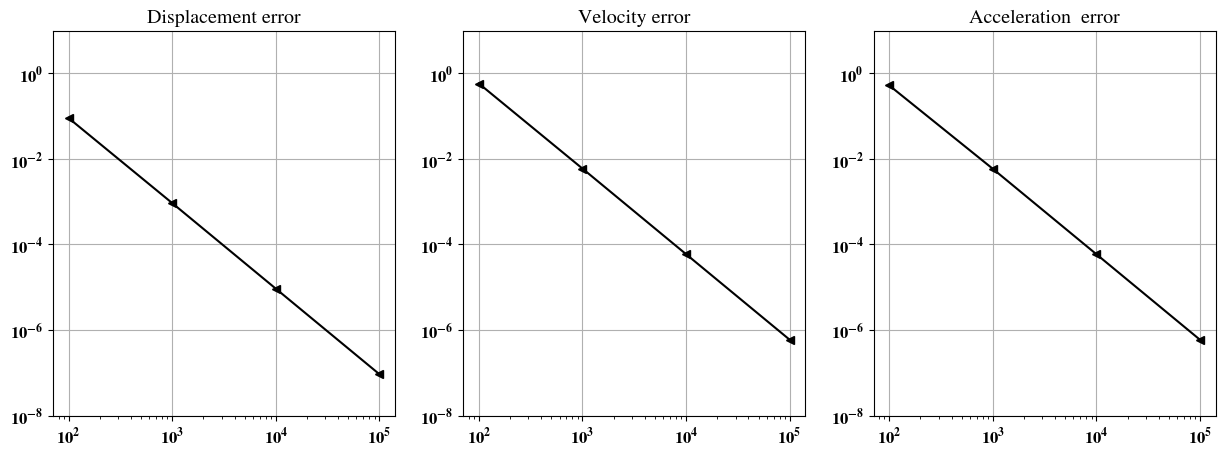

In [9]:
def errorODE1():    
    #----------------------------------------------------#
    exponent = np.array([2,3,4,5])
    cases    = 10**(exponent)
    errU     = np.zeros(exponent.shape)
    errV     = np.zeros(exponent.shape)
    errW     = np.zeros(exponent.shape)
    #----------------------------------------------------#
    m = 1.0
    k = 1.0
    f = 1.0
    c = 0.2
    𝜌 = 1.0
    u_init= 0.0
    v_init= 0.0
    tmax = 100.0
    t0 = 0.0
    #----------------------------------------------------#
    for i in range(0,len(cases)):
        (U𝛼,V𝛼,W𝛼,T𝛼,dU)   =genAlphaODE1(m,c,k,f,u_init,v_init,tmax,t0,cases[i],𝜌) 
        (U, V, W, T)        =springMassDamperFree(m,c,k,f,u_init,v_init,tmax,t0,cases[i])
        errU[i] = np.linalg.norm(U𝛼-U,2)  / np.linalg.norm(U,2)
        errV[i] = np.linalg.norm(V𝛼-V,2)  / np.linalg.norm(V,2)
        errW[i] = np.linalg.norm(W𝛼-W,2)  / np.linalg.norm(W,2)
    #----------------------------------------------------#
    fig = plt.figure( figsize=(15,5))
    plt.subplot(1,3,1)
    plt.loglog(cases,errU,'k<-')
    plt.grid(True)
    plt.ylim((1e-8,1e1))
    plt.title("Displacement error")
    #----------------------------------------------------#
    plt.subplot(1,3,2)
    plt.loglog(cases,errV,'k<-')
    plt.grid(True)
    plt.ylim((1e-8,1e1))
    plt.title("Velocity error")
    #----------------------------------------------------#
    plt.subplot(1,3,3)
    plt.loglog(cases,errW,'k<-')
    plt.grid(True)
    plt.ylim((1e-8,1e1))
    plt.title("Acceleration  error")
    return
errorODE1()

***
\begin{equation}
\mathbf{\text{Mesh generation function with gmsh api}}
\end{equation}
***

In [10]:
%matplotlib inline

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

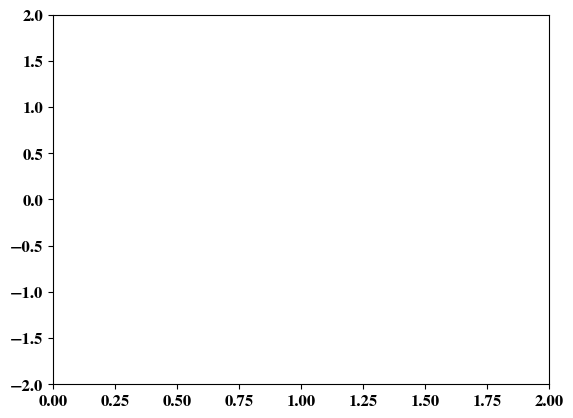

In [12]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [13]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())

In [14]:
anim._repr_html_() is None

True

In [15]:


anim



In [16]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [17]:
anim

In [18]:
writervideo = animation.FFMpegWriter(fps=60)
anim.save('increasingStraightLine.mp4', writer=writervideo)